In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Cuadrados mínimos


- Para un conjunto de datos $\left\{ \left(x_{1},y_{1}\right),...,\left(x_{m},y_{m}\right)\right\}$ , los coeficientes se encuentran resolviendo el sistema lineal

$
\left(\begin{array}{cccc}
f_{1}(x_{1}) & f_{2}(x_{1}) & \cdots & f_{n}(x_{1})\\
f_{1}(x_{2}) & \cdots & \cdots & f_{n}(x_{2})\\
\vdots &  &  & \vdots\\
f_{1}(x_{m}) & f_{2}(x_{m}) & \cdots & f_{n}(x_{m})
\end{array}\right)\left(\begin{array}{c}
a_{1}\\
a_{2}\\
\vdots\\
a_{m}
\end{array}\right)=\left(\begin{array}{c}
y_{1}\\
y_{2}\\
\vdots\\
y_{m}
\end{array}\right)
$

El siguiente método sirve para ajustar por cuadrados mínimos funciones de tipo polinómicas o senoidales:

In [1]:
def matriz_A(x,n,tipo):
    nx = len(x)
    A = np.zeros((nx,n))
    if tipo == 'polinomial':
        for i in range(nx):
            for j in range(n):
                A[i][j] = x[i]**j
    elif tipo == 'senoidal':
        for i in range(nx):
            for j in range(n):
                A[i][j] = np.sin((j+1)*x[i])
    return(A)
    
def cuadrados(x,y,n,tipo):
    A = matriz_A(x,n,tipo)
    B = np.dot(np.transpose(A),A)
    c = np.dot(np.dot(np.linalg.inv(B),np.transpose(A)),y)
    return(c)

def genera_ajustador(c,tipo):
    if tipo=='polinomial':
        def function(z):
            w=0
            for j in range(len(c)):
                w += c[j]*z**j
            return(w)
    elif tipo=='senoidal':
        def function(z):
            w=0
            for j in range(len(c)):
                w += c[j]*np.sin((j+1)*z)
            return(w)
    return(function)

Text(0, 0.5, 'y')

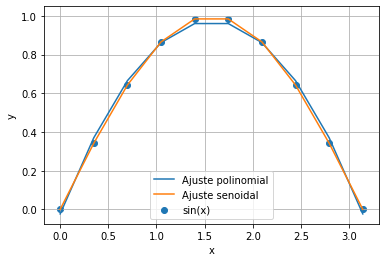

In [8]:
#Ejemplo:

x = np.linspace(0,np.pi,10)
y = np.sin(x)


cpol = cuadrados(x,y,3,'polinomial')            #Calculo los coeficientes del ajuste polinómico
csin = cuadrados(x,y,3,'senoidal')              #Calculo los coeficientes del ajuste sinusoidal

Ppol = genera_ajustador(cpol,'polinomial')      #Defino la función que ajusta a partir de los coeficientes hallados
Psin = genera_ajustador(csin,'senoidal')

plt.scatter(x,y, label = 'sin(x)')
plt.plot(x,Ppol(x), label = 'Ajuste polinomial')
plt.plot(x,Psin(x), label = 'Ajuste senoidal')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
